<a href="https://colab.research.google.com/github/van090902/Ngay8-3/blob/main/EMD_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyEMD

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 20.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


ppg = pd.read_csv('/content/EMD.csv', header=0)

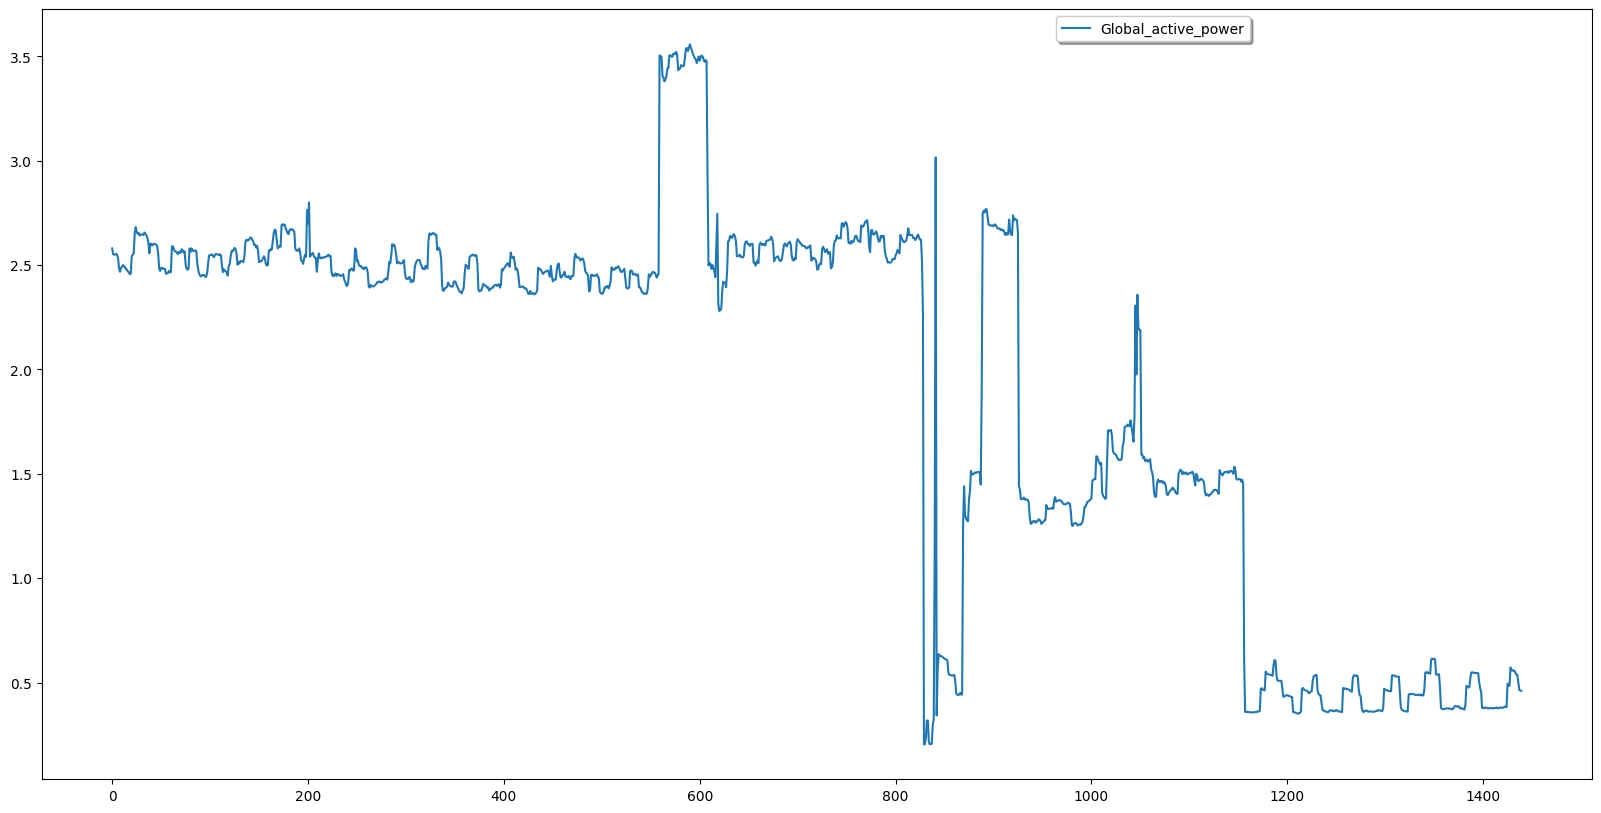

In [ ]:
#plt.subplots(figsize=(20,10))
labels = ppg.columns.values
ppg[0:5000].plot(figsize=(20,10), label=labels)
plt.legend(loc='upper left', bbox_to_anchor=(0.65, 1.00), shadow=True, ncol=4)
#plt.legend()



<Axes: >

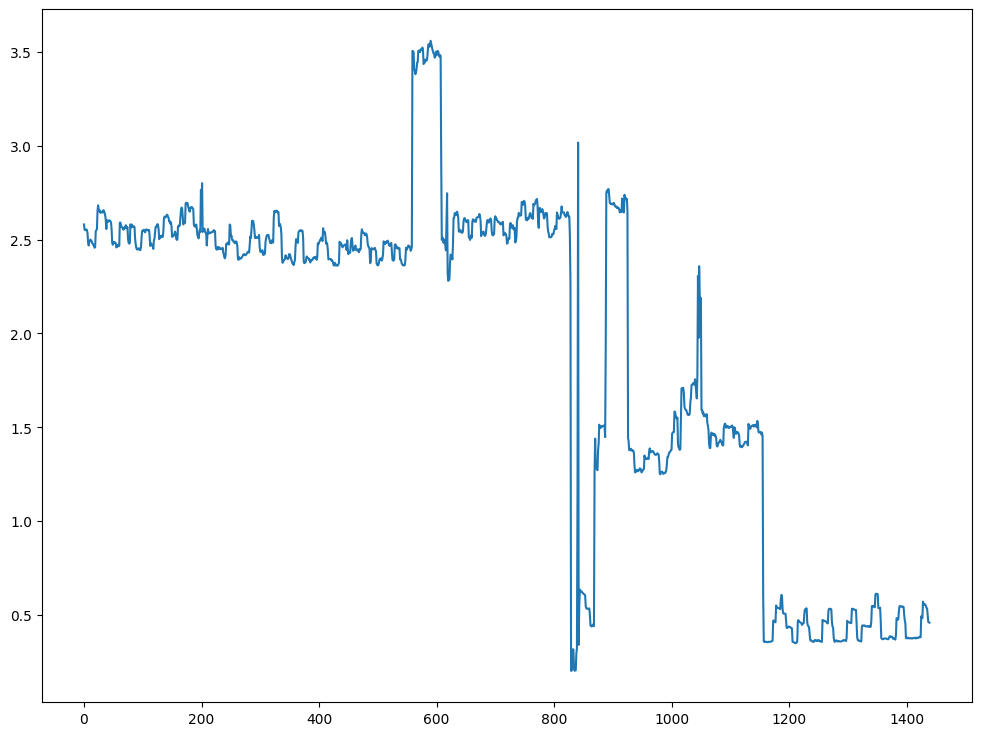

In [ ]:
ppg['Global_active_power'][0:10000].plot(figsize=(12,9), label=labels[0])

In [ ]:
from sklearn.preprocessing import minmax_scale
#Wavelet Decompsition
# take the number data in even length
#data  = minmax_scale(ppg['940nm'][0:np.size(ppg['940nm'])//2*2])
# function calculate length of data in power of 2 and larger > 1023 point
#name = '580nm'
name = 'Global_active_power'
M = np.size(ppg[name])
n = np.floor(np.log2(M))
N = int(2**n)
res = M - N
while res > 1023:
  n = np.floor(np.log2(res))
  N = N + int(2**n)
  res = M - N

data  = ppg[name][0:N] - np.mean(ppg[name][0:N])
data  = minmax_scale(ppg[name][0:N])

In [ ]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [ ]:
from PyEMD import EMD

#s = np.random.random(100)
#t = np.linspace(0, 1, 200)
#s = np.cos(11*2*np.pi*t*t) + 6*t*t 
s = data[0:2100]
emd = EMD()
IMFs = emd.emd(s)

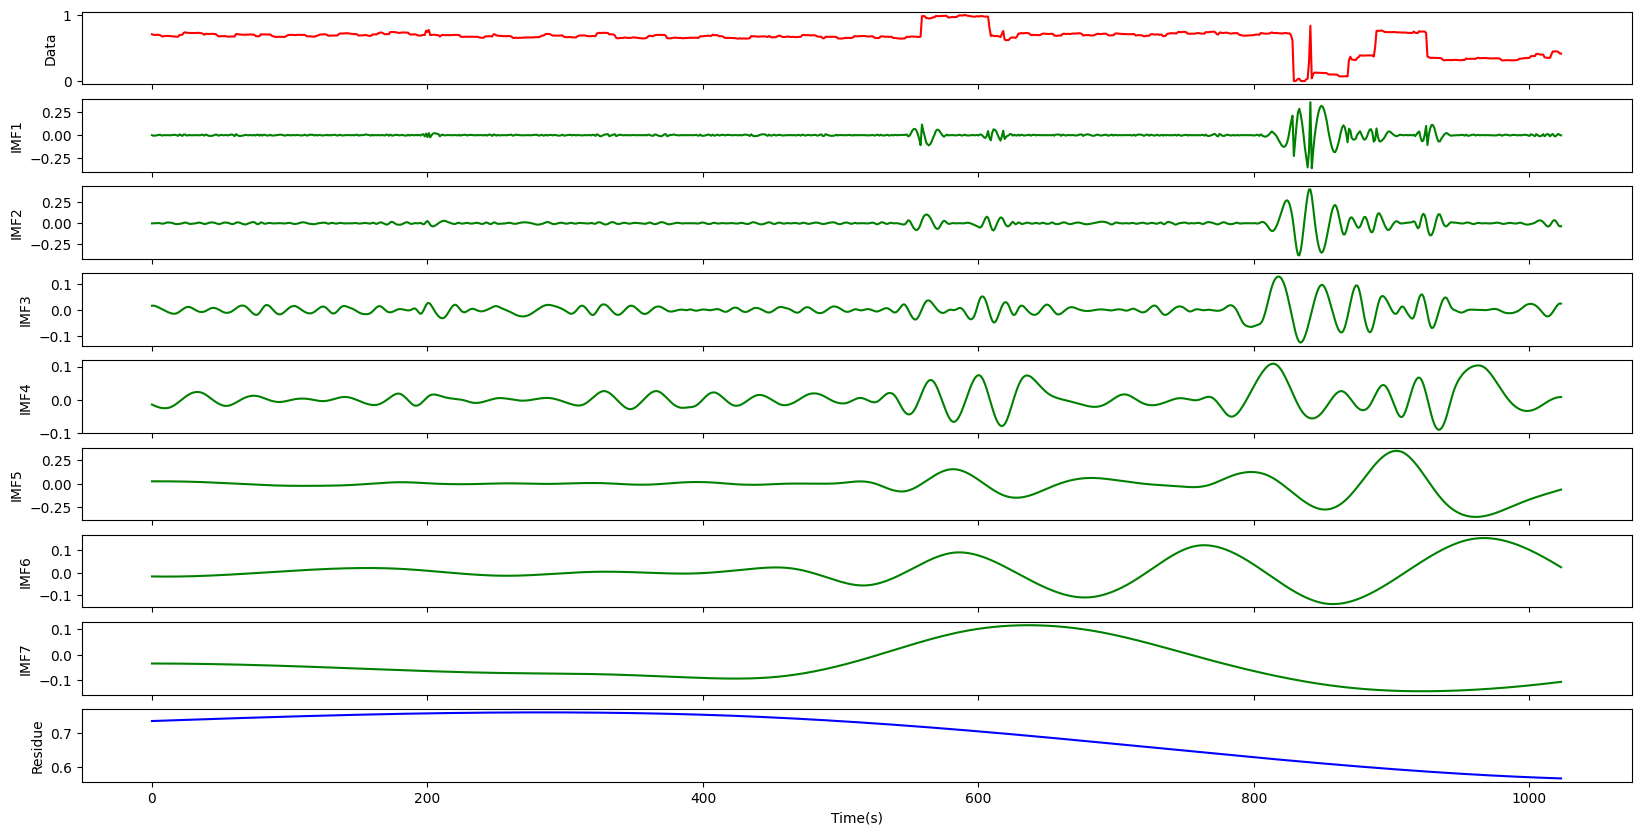

In [ ]:
N = IMFs.shape[0]
fig,axs = plt.subplots(N+1,1,figsize=(20,10))


L1, L2 = 0, len(s)
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,N+1)]
#labels = ['s','d1','d2','d3','d4','d5','d6','d7', 'a7']
for ax,i in zip(axs,n):
  

  if i==N:
     ax.plot(IMFs[N-1][L1:L2],'b')
     ax.set_xlabel('Time(s)')
     ax.set_ylabel('Residue') 
     #ax.xaxis.set_ticklabels(xlabel)
  elif i==0:
    ax.plot(s[L1:L2],'r')
    ax.set_ylabel('Data')
    #ax.xaxis.set_ticklabels([])
  else:
    ax.plot(IMFs[i-1][L1:L2],'g')
    ax.set_ylabel('IMF'+str(i))
  ax.label_outer()
  #ax.yaxis.tick_right()
  #ax.yaxis.Exponent = 5